# Simple Linear Regression Model

To find the correlation between a car's design parameters and its CO<sub>2</sub> emission value

To begin, lets import all the necessary modules

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl
import pickle

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

%matplotlib inline

The data source is the same:

In [2]:
df = pd.read_csv("../datasets/FuelConsumption.csv")
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Lets also see a sample of the dataset:

In [3]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Seems there might be multiple factors that can help determine the CO<sub>2</sub> emission value, but since I'm only making a simple regression model, I will try to select the best factor. For that, lets see some factors to select from. First, lets look at the relation between engine size and CO<sub>2</sub> emission:

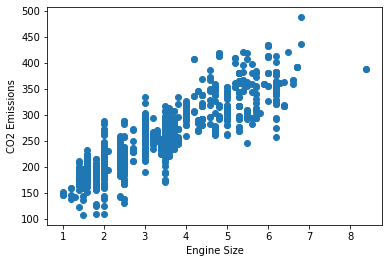

In [4]:
plt.scatter(df['ENGINESIZE'], df['CO2EMISSIONS'])
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")
plt.show()

This seems like the single most influential factor, but lets look at a couple of other factors, like vehicle class:

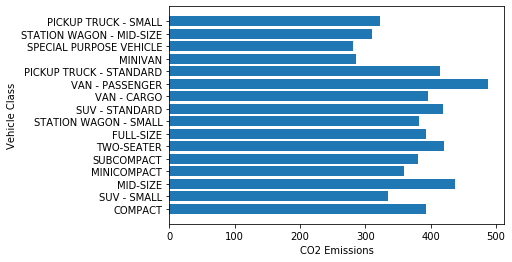

In [5]:
plt.barh(df['VEHICLECLASS'], df['CO2EMISSIONS'])
plt.xlabel("CO2 Emissions")
plt.ylabel("Vehicle Class")
plt.show()

and fuel consumption (there are multiple columns of fuel consumption values in the dataset, so I chose the seemingly most comprehensive one):

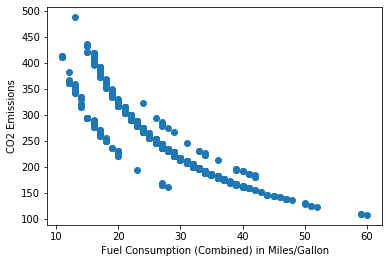

In [6]:
plt.scatter(df['FUELCONSUMPTION_COMB_MPG'], df['CO2EMISSIONS'])
plt.xlabel("Fuel Consumption (Combined) in Miles/Gallon")
plt.ylabel("CO2 Emissions")
plt.show()

I'll go forward with engine size as planned. To begin, lets split the dataset into training and test sets. I put the training set at 80% of the total data, just to make it comparable to the solution notebook (be careful about the way I'm handling the data here, `sklearn` seems to be _very_ specific about the input data type)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(np.asanyarray(df[['ENGINESIZE']]), np.asanyarray(df[['CO2EMISSIONS']]), test_size=0.2)

Initialize the model and fit it to the training set to see what our model's equation looks like. The general equation looks like: $\hat{y} = [intercept] + [coefficient] \times x_1$

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)
print("Model equation: y_hat = {} + {}*x_1".format(model.intercept_[0], model.coef_[0][0]))

Model equation: y_hat = 126.87666180780352 + 38.629896070668*x_1


Seems to be working fine. Lets test the model using the test data:

In [9]:
prediction = model.predict(X_test)

To find out how well the model works, I'll just get the R<sup>2</sup> score of the test data (in simple terms, the higher the R<sup>2</sup> score, the better the model works, and the score can only go upto 1, but can also go into negative values):

In [10]:
r2_score(prediction, y_test)

0.6731131634616709

Although we're done here, I'd like to see a graphical representation of the model I just made by plotting the equation we got earlier onto the plot between engine size and CO<sub>2</sub> emissions:

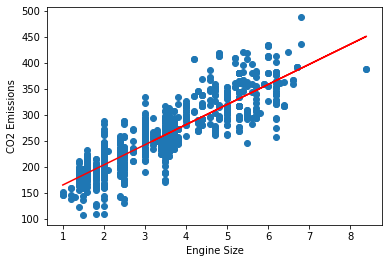

In [11]:
plt.scatter(df['ENGINESIZE'], df['CO2EMISSIONS'])
plt.plot(X_train, model.intercept_[0] + model.coef_[0][0]*X_train, color='red')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")
plt.show()

One last thing before leaving, lets save our model into a dumps file:

In [12]:
pickle.dump(model, open('../saved_models/model_1.sav', 'wb'))